# This Game a player can choose between two symbols with his opponent, the usual games use “X” and “O”. If the first player chooses “X”, then the second player must play with “O” and vice versa.  This game is very popular and is quite simple in itself. It is a two-player game. In this game, there is a board with 3×3 squares.

In [ ]:
from tkinter import *
import numpy as np

size_of_board = 800
symbol_size = (size_of_board / 3 - size_of_board / 8) / 2
symbol_thickness = 50
symbol_X_color = '#EE4035'
symbol_O_color = '#0492CF'
Green_color = '#7BC043'


class Tic_Tac_Toe():
    # Initialization Functions:
    def __init__(self):
        self.window = Tk()
        self.window.title('Tic-Tac-Toe')
        self.canvas = Canvas(self.window, width=size_of_board, height=size_of_board)
        self.canvas.pack()
        # Input from user in form of clicks
        self.window.bind('<Button-1>', self.click)

        self.initialize_board()
        self.player_X_turns = True
        self.board_status = np.zeros(shape=(3, 3))

        self.player_X_starts = True
        self.reset_board = False
        self.gameover = False
        self.tie = False
        self.X_wins = False
        self.O_wins = False

        self.X_score = 0
        self.O_score = 0
        self.tie_score = 0

    def mainloop(self):
        self.window.mainloop()

    def initialize_board(self):
        for i in range(2):
            self.canvas.create_line((i + 1) * size_of_board / 3, 0, (i + 1) * size_of_board / 3, size_of_board)

        for i in range(2):
            self.canvas.create_line(0, (i + 1) * size_of_board / 3, size_of_board, (i + 1) * size_of_board / 3)

    def play_again(self):
        self.initialize_board()
        self.player_X_starts = not self.player_X_starts
        self.player_X_turns = self.player_X_starts
        self.board_status = np.zeros(shape=(3, 3))

    # Drawing Functions:
    
    def draw_O(self, logical_position):
        logical_position = np.array(logical_position)
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_oval(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                outline=symbol_O_color)

    def draw_X(self, logical_position):
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] + symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] - symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)

    def display_gameover(self):

        if self.X_wins:
            self.X_score += 1
            text = 'Winner: Player 1 (X)'
            color = symbol_X_color
        elif self.O_wins:
            self.O_score += 1
            text = 'Winner: Player 2 (O)'
            color = symbol_O_color
        else:
            self.tie_score += 1
            text = 'Its a tie'
            color = 'gray'

        self.canvas.delete("all")
        self.canvas.create_text(size_of_board / 2, size_of_board / 3, font="cmr 60 bold", fill=color, text=text)

        score_text = 'Scores \n'
        self.canvas.create_text(size_of_board / 2, 5 * size_of_board / 8, font="cmr 40 bold", fill=Green_color,
                                text=score_text)

        score_text = 'Player 1 (X) : ' + str(self.X_score) + '\n'
        score_text += 'Player 2 (O): ' + str(self.O_score) + '\n'
        score_text += 'Tie                    : ' + str(self.tie_score)
        self.canvas.create_text(size_of_board / 2, 3 * size_of_board / 4, font="cmr 20 bold", fill=Green_color,
                                text=score_text)
        self.reset_board = True

        score_text = 'If you want to play again \n'
        self.canvas.create_text(size_of_board / 2, 15 * size_of_board / 16, font="cmr 20 bold", fill="gray",
                                text=score_text)

    # Logical Functions:
    def convert_logical_to_grid_position(self, logical_position):
        logical_position = np.array(logical_position, dtype=int)
        return (size_of_board / 3) * logical_position + size_of_board / 6

    def convert_grid_to_logical_position(self, grid_position):
        grid_position = np.array(grid_position)
        return np.array(grid_position // (size_of_board / 3), dtype=int)

    def is_grid_occupied(self, logical_position):
        if self.board_status[logical_position[0]][logical_position[1]] == 0:
            return False
        else:
            return True

    def is_winner(self, player):

        player = -1 if player == 'X' else 1

        # Three in a row
        for i in range(3):
            if self.board_status[i][0] == self.board_status[i][1] == self.board_status[i][2] == player:
                return True
            if self.board_status[0][i] == self.board_status[1][i] == self.board_status[2][i] == player:
                return True

        # Diagonals
        if self.board_status[0][0] == self.board_status[1][1] == self.board_status[2][2] == player:
            return True

        if self.board_status[0][2] == self.board_status[1][1] == self.board_status[2][0] == player:
            return True

        return False

    def is_tie(self):

        r, c = np.where(self.board_status == 0)
        tie = False
        if len(r) == 0:
            tie = True

        return tie

    def is_gameover(self):
        
        self.X_wins = self.is_winner('X')
        if not self.X_wins:
            self.O_wins = self.is_winner('O')

        if not self.O_wins:
            self.tie = self.is_tie()

        gameover = self.X_wins or self.O_wins or self.tie

        if self.X_wins:
            print('X wins')
        if self.O_wins:
            print('O wins')
        if self.tie:
            print('Its a tie')

        return gameover





    def click(self, event):
        grid_position = [event.x, event.y]
        logical_position = self.convert_grid_to_logical_position(grid_position)

        if not self.reset_board:
            if self.player_X_turns:
                if not self.is_grid_occupied(logical_position):
                    self.draw_X(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = -1
                    self.player_X_turns = not self.player_X_turns
            else:
                if not self.is_grid_occupied(logical_position):
                    self.draw_O(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = 1
                    self.player_X_turns = not self.player_X_turns

            # Game is concluded
            if self.is_gameover():
                self.display_gameover()
                
        else:  
            self.canvas.delete("all")
            self.play_again()
            self.reset_board = False


game_instance = Tic_Tac_Toe()
game_instance.mainloop()

Its a tie
O wins


# 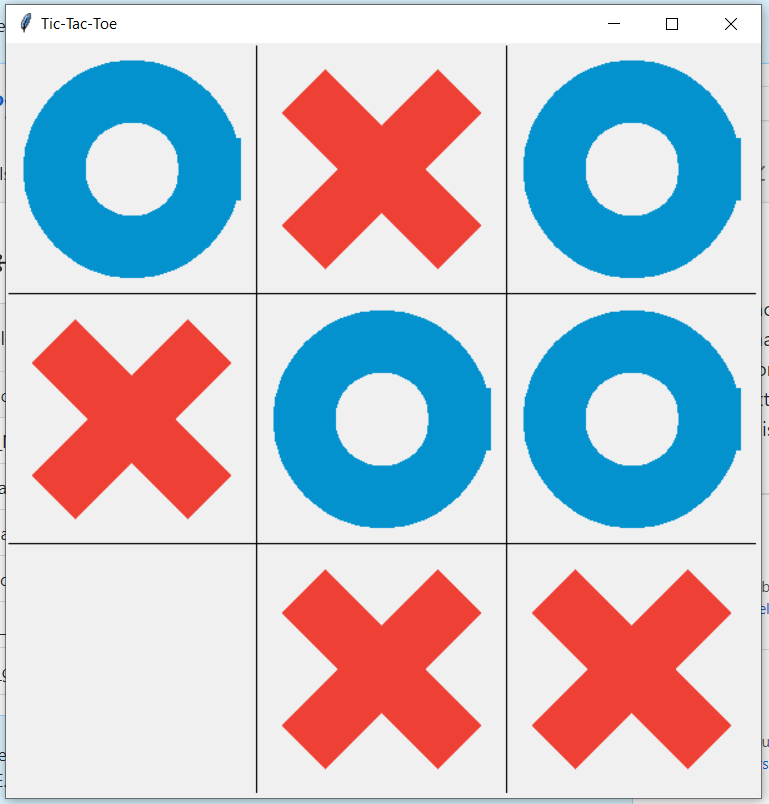

# 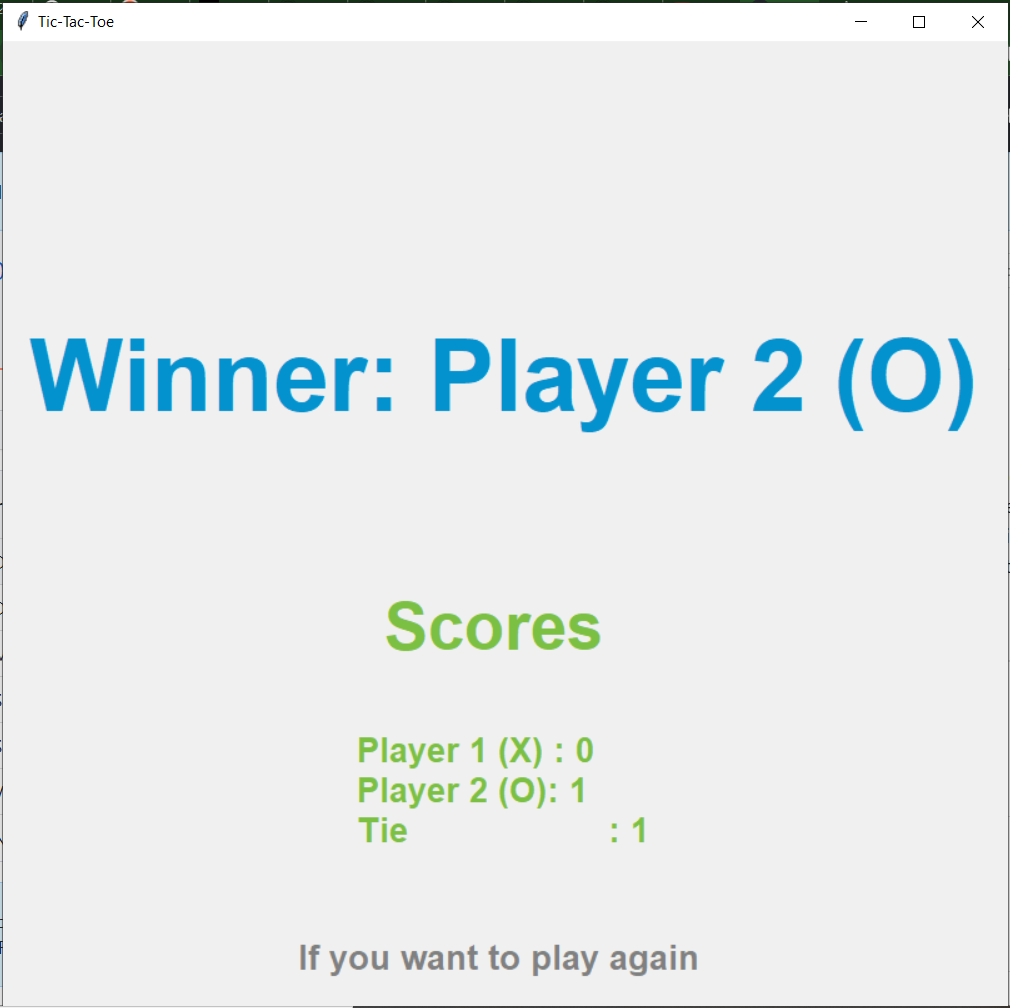